# 입시 분석

In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline
# %matplotlib nbagg
    
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]


# Suppress Deprecation and Incorrect Usage Warnings 
import warnings
warnings.filterwarnings('ignore')

# #  display two pandas tables side by side
# from IPython.display import display, HTML
# CSS = """
# .output {
#     flex-direction: row;
# }
# """
# HTML('<style>{}</style>'.format(CSS))


# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

# allow multiple outputs
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

# allow image input
from IPython.display import Image

In [2]:
app_info = pd.read_excel(
    './data/지원자현황(전체).xlsx', 
    sheet_name='입시지원자', 
    parse_dates=True).dropna(how='all', axis=1)
app_info = app_info.loc[:, app_info.count() > 70]

## 분석목차

1. 지원 일반
    - 연도별 지원자수
    - 지원자 수 평균
    - 지원자 성별
2. 지원대륙/국/도시
    - 지원자 수 많은 상위 10개국/10개도시
    - 상위 10개국/10개도시 연도별 지원자수
    - 국가별 지원자 당 합격자수
3. 지원기관
    - 지원자 출신
4. 기타
    - 많이 사용하는 이메일 계정
    

In [4]:
app_info.columns.values

array(['학년도', '학기코드', '대학원구분', '수험번호', '전형유형', '학위구분코드', '지원과정구분코드',
       '모집단위코드', '계열코드', '학과코드', '전공코드', '지원자이름', '영문이름', '성별', '생년월일',
       '주소1', '전화번호', '핸드폰번호', '이메일', '시험구분코드', '외국어점수', '대학교명', '대학교학과명',
       '대학교졸업일자', '대학원대학명', '대학원학과명', '대학원졸업일자', '국가코드', '보호자명', '보호자주소1',
       '지원일자', '비상연락망', '영문이름(First)', '영문이름(Middle)', '영문이름(Last)',
       '혼인여부', '종교', '비상연락망(이메일)', '기관명', '부서', '현직위', '현직위시작일', '기관전화번호',
       '기관분류1', '담당업무', '업무능력', '업무연관성', '업무경력(기관명1)', '업무경력(부서1)',
       '업무경력(직위1)', '업무경력(담당업무1)', '업무경력(시작일1)', '업무경력(종료일1)',
       '업무경력(기관명2)', '업무경력(부서2)', '업무경력(직위2)', '업무경력(담당업무2)', '업무경력(시작일2)',
       '업무경력(종료일2)', '업무경력(기관명3)', '업무경력(직위3)', '업무경력(시작일3)', '대학교소재',
       '대학교입학일자', '대학원소재', '대학원입학일자', '기피음식', '신청번호', 'ID', 'Password',
       '모국어', '제2외국어', '자기소개답변-성과및관심분야', '자기소개답변-지원동기', '자기소개답변-활용',
       '학업계획', '완료여부', '영문이름(수정 전)', '생년월일(수정 전)', '생년월일(날짜서식)', '기수',
       '현황', '등록', '학번부여', '대륙', '대륙_국문', '대륙2', '대륙2_국문', '국가(영문)',
      

## 지원 일반

### 연도별 지원자수 및 지원자수 평균

In [9]:
app_yearnum = \
app_info.pivot_table(
    values='영문이름', index='학년도', columns='성별2', aggfunc='count', 
    margins=True, margins_name='합계')
app_yearnum.columns.name = '성별'

app_yearnum_mean = pd.DataFrame(
    app_yearnum.mean(), columns=["평균값"]).T

app_yearnum = app_yearnum.append(app_yearnum_mean).round()
# 동일: pd.concat([app_yearnum, app_yearnum_mean])
app_yearnum

성별,남,여,합계
2012,8.0,11.0,19.0
2013,15.0,19.0,34.0
2014,13.0,22.0,35.0
2015,30.0,27.0,57.0
2016,39.0,19.0,58.0
2017,71.0,40.0,111.0
2018,19.0,14.0,33.0
2019,41.0,19.0,60.0
합계,236.0,171.0,407.0
평균값,52.0,38.0,90.0


### 연도별 지원자 현황 그래프

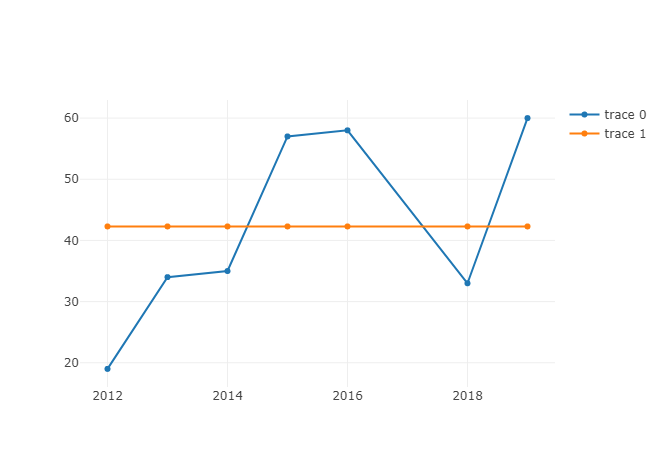



연도별 지원자 수 평균은 50.88이다.




In [10]:
year_grouped = app_info.groupby(['학년도'])

trace1 = go.Scatter(x = year_grouped2['영문이름'].count().index, 
                          y = year_grouped2['영문이름'].count())
trace2 = go.Scatter(x = year_grouped2['영문이름'].count().index, 
                          y = [year_grouped2['영문이름'].count().mean()]*
                                len(year_grouped2['영문이름'].count().index))

iplot([trace1, trace2])
print("\n")
print("연도별 지원자 수 평균은 %s이다."%(round(year_grouped['영문이름'].count().mean(), 2)), end="\n")
print("\n")



연도별 지원자 수 평균은 50.88이다.




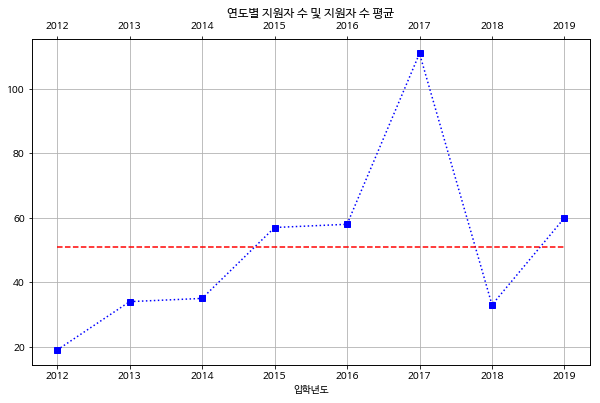

In [22]:
fig, ax1 = plt.subplots()  # fig = plt.figure() ; ax1 = fig.add_subplot(111)

ax2 = ax1.twiny()
year_grouped = app_info.groupby(['학년도'])
ax1.set_title('연도별 지원자 수 및 지원자 수 평균')
ax1.plot(year_grouped['영문이름'].count().index, 
         year_grouped['영문이름'].count(), 'bs:')
ax1.set_xlabel("입학년도")
ax1.grid(True)

ax2.plot(year_grouped['영문이름'].count().index,
         [year_grouped['영문이름'].count().mean()]*
         len(year_grouped['영문이름'].count().index), 'r--')

print("\n")
print("연도별 지원자 수 평균은 %s이다."%(round(year_grouped['영문이름'].count().mean(), 2)), end="\n")
print("\n")

### 연도별 지원자 현황 그래프2 (그래프 및 추가 설명선 삽입)



연도별 지원자 수 평균은 50.88이다.




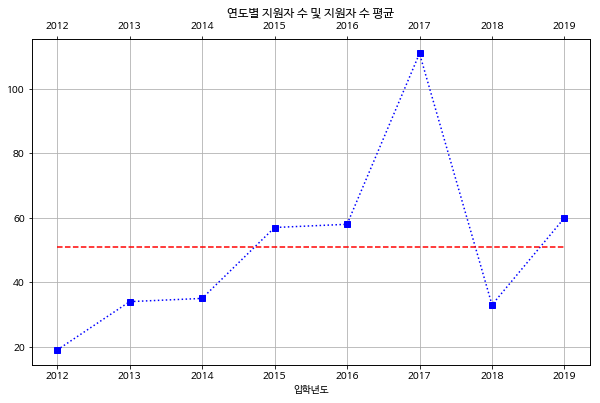

In [22]:
year_grouped = app_info.groupby(['학년도'])
# title('연도별 지원자 수 및 지원자 수 평균')
ax1.plot(year_grouped['영문이름'].count().index, 
         year_grouped['영문이름'].count(), 'bs:')
ax1.set_xlabel("입학년도")
ax1.grid(True)

ax2.plot(year_grouped['영문이름'].count().index,
         [year_grouped['영문이름'].count().mean()]*
         len(year_grouped['영문이름'].count().index), 'r--')

# Add some extra space for the second axis at the bottom 

# fig.subplots_adjust(bottom=0.2) 
# ax1.set_xticks(range(-100, 100, 10)) 
# ax1.set_xlim(-100, 100) 
# ax1.set_xticklabels([str(i) for i in range(-100, 100, 10)], rotation=45) 

# ax2.spines["bottom"].set_position(("axes", -0.1)) 
# ax2.xaxis.set_ticks_position("bottom") 
# ax2.spines["bottom"].set_visible(True) 
# ax2.set_xticks([-50,50]) 
# ax2.set_xticklabels(['Line 1', 'Line 2'], rotation=45, color='blue') 
# ax2.set_xlim(-100, 100) 

# b1 = np.random.randint(0,100,6) 
# b2 = np.random.randint(0,100,6) 
# b3 = np.random.randint(0,100,6) 
# ax1.scatter(np.random.normal(0, 1, 100)*100, np.random.normal(0, 1, 100)*100, c='green', s=90) 
# ax1.axvline(-50) 
# ax1.axvline(50) 

# plt.show() 


print("\n")
print("연도별 지원자 수 평균은 %s이다."%(round(year_grouped['영문이름'].count().mean(), 2)), end="\n")
print("\n")

### 연도별 지원자 현황 그래프 (2017년 제외)

In [6]:
# import plotly standard
from plotly import __version__
print (__version__)
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np
import plotly.figure_factory as ff

# Cufflinks wrapper on plotly
import cufflinks as cf

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell

# plotly + cufflinks in offline mode
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
cf.go_offline()

# set the global theme
cf.set_config_file(world_readable=True, theme='pearl', offline=True)

# Jupyter setup
init_notebook_mode(connected=True)

# 출처: https://www.youtube.com/watch?v=XUNaGFa9xCM
import ipywidgets as widgets
import scipy as special
import numpy as np

3.7.0


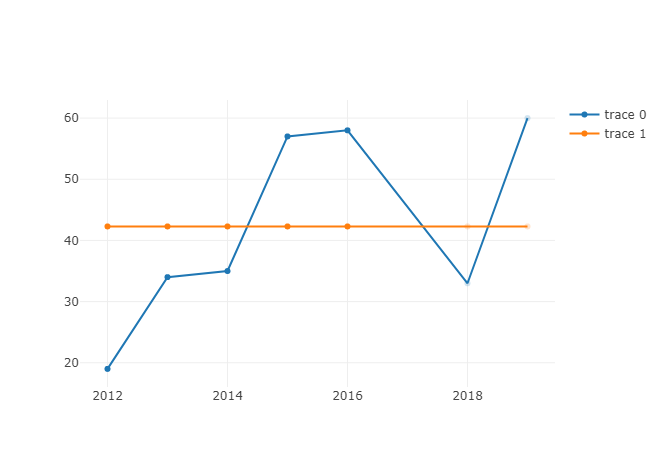



이상치인 2017년을 제외하고 측정하였을 때, 연도별 지원자 수 평균은 42.29이다.




In [11]:
year_grouped2 = app_info[app_info['학년도'] != 2017].groupby(['학년도'])

trace1 = go.Scatter(x = year_grouped2['영문이름'].count().index, 
                          y = year_grouped2['영문이름'].count())
trace2 = go.Scatter(x = year_grouped2['영문이름'].count().index, 
                          y = [year_grouped2['영문이름'].count().mean()]*
                                len(year_grouped2['영문이름'].count().index))

iplot([trace1, trace2])
print("\n")
print("이상치인 2017년을 제외하고 측정하였을 때, \
연도별 지원자 수 평균은 %s이다."%(round(year_grouped2['영문이름'].count().mean(), 2)), end="\n")
print("\n")

In [ ]:
fig, ax1 = plt.subplots()
ax2 = ax1.twiny()
year_grouped2 = app_info[app_info['학년도'] != 2017].groupby(['학년도'])
ax1.set_title('연도별 지원자 수 및 지원자 수 평균')
ax1.plot(year_grouped2['영문이름'].count().index, 
         year_grouped2['영문이름'].count(), 'bs:')
ax2.plot(year_grouped2['영문이름'].count().index,
         [year_grouped2['영문이름'].count().mean()]*
         len(year_grouped2['영문이름'].count().index), 'r--')
ax1.set_ylim(17, 115)
ax1.set_xlabel("입학년도")
ax1.grid(True)

print("\n")
print("이상치인 2017년을 제외하고 측정하였을 때, \
연도별 지원자 수 평균은 %s이다."%(round(year_grouped2['영문이름'].count().mean(), 2)), end="\n")
print("\n")

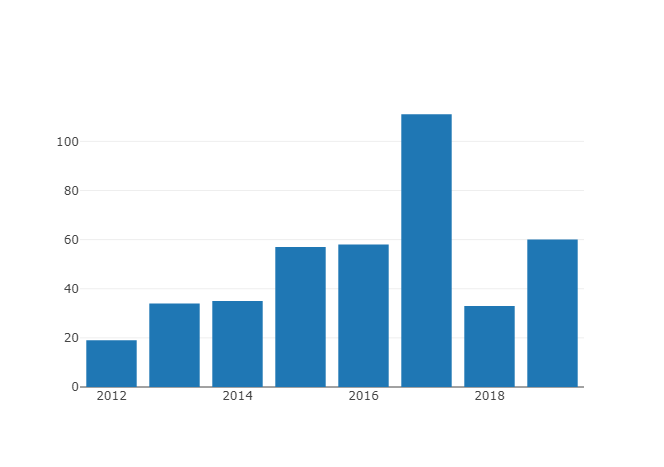

In [17]:
iplot([go.Bar(x = year_grouped['영문이름'].count().index, 
                y = year_grouped['영문이름'].count())])

In [ ]:
plt.bar(year_grouped['영문이름'].count().index, 
        year_grouped['영문이름'].count())
plt.title('연도별 지원자 수 및 지원자 수 평균')
plt.ylabel('지원자수')
plt.grid(True)

### 지원자 성별

In [40]:
gr_sex = app_info.groupby(['학년도','성별2'])['영문이름'].count().unstack()

In [ ]:
sns.countplot(x=app_info['학년도'], hue=app_info.rename(columns={'성별':'성별코드','성별2':'성별'})['성별'])
plt.title('연도별/성별 지원자 수')
plt.ylabel('지원자수')
plt.grid(True)

### 지원대륙/국/도시
    - 지원자 수 많은 상위 10개국/10개도시
    - 상위 10개국/10개도시 연도별 지원자수
    - 국가별 지원자 당 합격자수

#### 지원자 수 상위 10개국

In [ ]:
app_info_con_count = pd.DataFrame(
    app_info['국가(영문)'].value_counts().head(11))
app_info_con_percent = pd.DataFrame(
    (app_info['국가(영문)'].value_counts(
    normalize=True)*100).round(2).apply(lambda x: 
    str(x)+"%").head(11))
app_info_con_df = app_info_con_count.merge(
    app_info_con_percent, left_index=True, right_index=True)
app_info_con_df.columns = ['지원자 수', '비율']
app_info_con_df

#### 지원자 수 상위 10개도시

In [ ]:
app_info_city_count = pd.DataFrame(
    app_info['도시_영문'].value_counts().head(10))
app_info_city_percent = pd.DataFrame(
    (app_info['도시_영문'].value_counts(
    normalize=True)*100).round(2).apply(lambda x: 
    str(x)+"%").head(11))
app_info_city_df = app_info_city_count.merge(
    app_info_city_percent, left_index=True, right_index=True)
app_info_city_df.columns = ['지원자 수', '비율']
app_info_city_df

In [ ]:
app_info_city_des = app_info.pivot_table(
    values='영문이름',index='학년도', columns='도시_영문',
    aggfunc='count').fillna(0)

mean = []
for city in app_info_city_df.index:
    x = app_info_city_des[city].mean()
    mean.append(x)
app_info_city_df['평균'] = mean
app_info_city_df['평균'] = app_info_city_df['평균'].round(2)

std = []
for city in app_info_city_df.index:
    x = app_info_city_des[city].std()
    std.append(x)
app_info_city_df['표준편차'] = std
app_info_city_df['표준편차'] = app_info_city_df['표준편차'].round(2)

app_info_city_df

1. 지원자 수 많은 국가 중 'ALGERIA'의 표준편차가 큰 것을 볼 때, 특정년도에 지원자 수가 편중되었음을 알 수 있다. 
2. 'INDONESIA'의 표준편차가 1 미만이며, 'CAMBODIA' 역시 표준편차가 낮게 나타났다. 
  - 두 나라는 비교적 지원자가 일정한 수준으로 있어왔으며, 인적 자원 활용이나 정부 차원의 홍보 등의 요인으로 추정할 수 있다. 
  - 아울러, 두 국가에서는 본 과정이 어느 정도 정착된 프로그램임을 추정할 수 있다.

#### 지원자 수 대비 합격자 수

# 동문 및 재학생 분석

## 분석목차

1. 일반
    - 연도별 입학생 수
    - 시립대 출신 / 고대 출신 입학생
        - 상당수의 고대동문들이 있지만 출신학교의 상이함으로 관리가 어려움. 
        - 동문회 조직을 통한 기관 내 활동 장려 
    
2. 대륙/국/도시
    - 학생 수 많은 상위 10개국/10개도시
    - 상위 10개국/10개도시
3. 지원기관
    - 지원자 출신
4. 기타
    - 많이 사용하는 이메일 계정    

In [3]:
stu_info = pd.read_excel('./data/IUDP학생현황.xlsx',
                         date_parser=['참가기간(시작)', '참가기간(종료)', '체류기간(시작)', '체류기간(종료)', '인턴십 기간(시작)', 
                                      '인턴십 기간(종료)', '인턴십 기간2(시작)', '인턴십 기간2(종료)', '인턴십 기간3(시작)', 
                                      '인턴십 기간3(종료)', '국외여행1-1', '국외여행1-2', '국외여행2-1', '국외여행2-2', '국외여행3-1', '국외여행3-2'])
# Z:/200. 연락처/IUDP학생현황.xlsx
stu_info.shape  

(341, 88)

## 연도별 입학생 수

In [4]:
# stu_info['참가기간(시작)'].dt.year

year_grouped = \
stu_info[stu_info['전공'] == 'MUAP'
        ].groupby([stu_info['참가기간(시작)'].dt.year])

year_grouped1 =\
stu_info[(stu_info['전공'] == 'MUAP') & 
         (stu_info['참가기간(시작)'] < '2012')
        ].groupby([stu_info['참가기간(시작)'].dt.year])

year_grouped2 =\
stu_info[(stu_info['전공'] == 'MUAP') & 
         (stu_info['참가기간(시작)'] >= '2012')
        ].groupby([stu_info['참가기간(시작)'].dt.year])

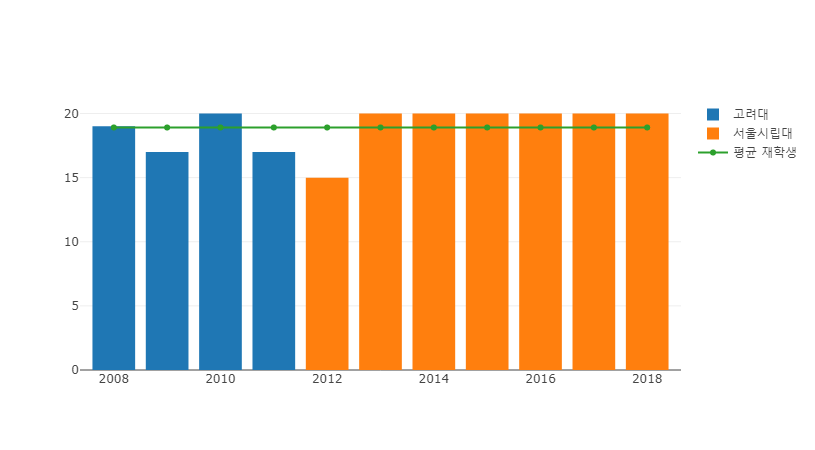

In [10]:
trace1 = go.Bar(x = year_grouped1['성명'].count().index, 
                y = year_grouped1['성명'].count(), name='고려대')
trace2 = go.Bar(x = year_grouped2['성명'].count().index, 
                y = year_grouped2['성명'].count(), name='서울시립대')
trace = go.Scatter(x = year_grouped['성명'].count().index, 
                   y = [year_grouped['성명'].count().mean()]*
                    len(year_grouped['성명'].count().index), name='평균 재학생')


iplot([trace1, trace2, trace])
# print("\n")
# print("이상치인 2017년을 제외하고 측정하였을 때, \
# 연도별 지원자 수 평균은 %s이다."%(round(year_grouped2['성명'].count().mean(), 2)), end="\n")
# print("\n")

## 시립대 / 고대 총학생수

In [23]:
year_grouped1 = \
stu_info[(stu_info['전공'] == 'MUAP') & (stu_info['참가기간(시작)'] < '2012')]['성명'].count()

year_grouped2 = \
stu_info[(stu_info['전공'] == 'MUAP') & (stu_info['참가기간(시작)'] >= '2012')]['성명'].count()

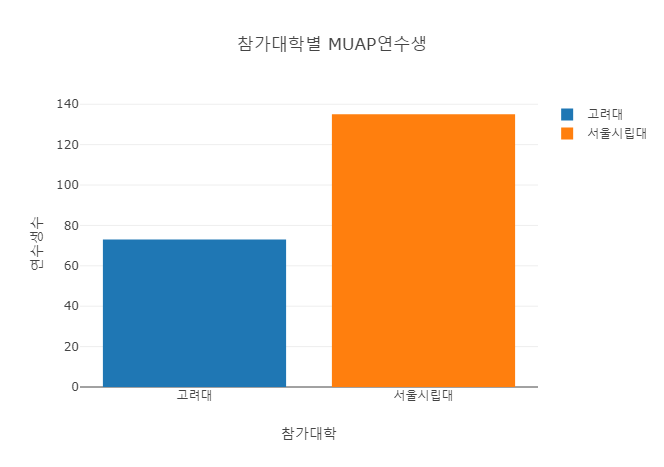

In [36]:
trace1 = go.Bar(x=['고려대'],
                  y = [year_grouped1], name='고려대')
trace2 = go.Bar(x=['서울시립대'],
                  y = [year_grouped2], name='서울시립대')
data = [trace1, trace2]

layout = go.Layout(
       title='참가대학별 MUAP연수생',
       xaxis=dict(
        title='참가대학'),
        yaxis=dict(
        title='연수생수',
        showgrid=True,
        dtick=20),
)
        
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='참가대학별 MUAP연수생')

## 국가별 학생수

In [21]:
stu_muap_by_con

대학,고려대,서울시립대
국가_국문,,
과테말라,2,0
나이지리아,0,9
네팔,0,3
대만,8,2
라오스,0,3
르완다,0,3
리비아,0,1
몽골,10,15
미얀마,0,7


In [22]:
stu_info['대학'] = pd.Categorical(np.where(stu_info['참가기간(시작)'].dt.year.between(2008,2011),
                                         '고려대', '서울시립대')).astype('object') 
# .astype('object') : Categorical 인덱스를 str으로 변경

stu_muap = stu_info[stu_info['전공'] == 'MUAP']

stu_muap_by_con = stu_muap.groupby(['대학', '국가_국문'])['성명'].count().unstack(level=0).fillna(0).astype(int).rename(index={'국가_국문': '국가명'})

In [23]:
pd.concat([stu_muap_by_con, stu_muap_by_con.sum(axis=1)], 1).rename(
    columns={0: '합계'}).sort_values(by='합계', ascending=False).head(10)

,고려대,서울시립대,합계
국가_국문,,,
중국,14,16,30
몽골,10,15,25
캄보디아,1,12,13
인도네시아,4,8,12
대만,8,2,10
태국,4,6,10
나이지리아,0,9,9
폴란드,2,7,9
베트남,2,6,8


****몽골 내 고려대 동문회 조직화하는 것이 필요****